<a href="https://colab.research.google.com/github/praptiii/stock_price_prediction_lstm/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)


In [ ]:
data

Price,index,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,2012-01-03,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
1,1,2012-01-04,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2,2,2012-01-05,16.354961,16.413727,16.537264,16.344486,16.491436,131808205
3,3,2012-01-06,16.131855,16.189817,16.438385,16.184088,16.417213,108119746
4,4,2012-01-09,15.447884,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...,...
2756,2756,2022-12-14,94.968765,95.309998,97.220001,93.940002,95.540001,26452900
2757,2757,2022-12-15,90.873474,91.199997,94.029999,90.430000,93.540001,28298800
2758,2758,2022-12-16,90.534706,90.860001,91.750000,90.010002,91.199997,48485500


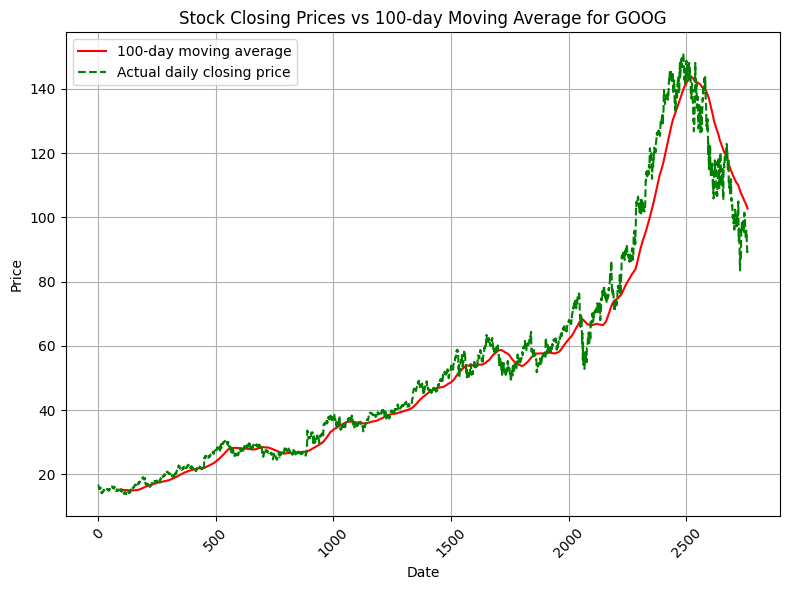

In [ ]:
ma_100_days = data.Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r',label='100-day moving average', linestyle='-')
plt.plot(data.Close, 'g',label='Actual daily closing price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Closing Prices vs 100-day Moving Average for {stock}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




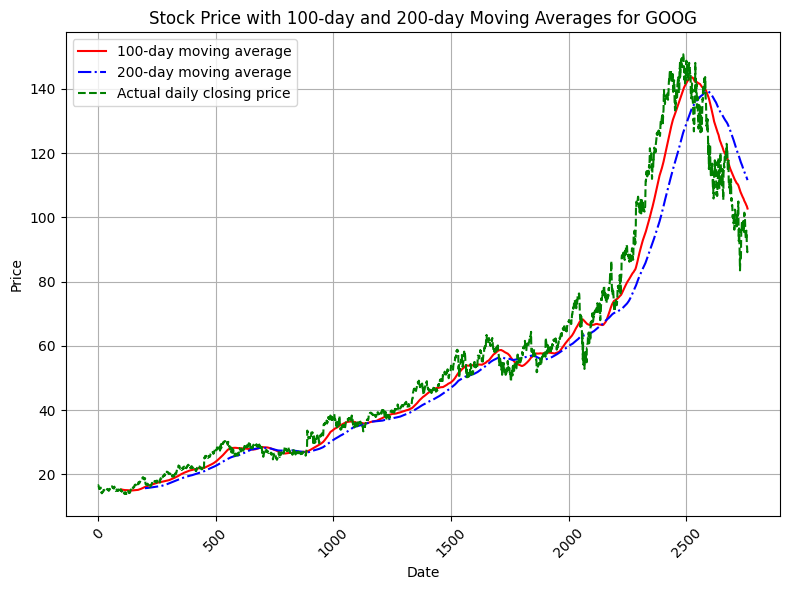

In [ ]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r',label='100-day moving average', linestyle='-')
plt.plot(ma_200_days,'b',label='200-day moving average', linestyle='-.')
plt.plot(data.Close,'g',label='Actual daily closing price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Price with 100-day and 200-day Moving Averages for {stock}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data.dropna(inplace=True)


In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2208

In [ ]:
data_test.shape[0]


553

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_scaled = scaler.fit_transform(data[['Open', 'Close']])
data_test_scaled = scaler.transform(data[['Open', 'Close']])

In [ ]:
data_train_scale = scaler.fit_transform(data_train)


x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
model = Sequential()

In [ ]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Train the model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - loss: 0.0730
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - loss: 0.0061
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - loss: 0.0055
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - loss: 0.0051
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0051
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 332ms/step - loss: 0.0047
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 324ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - loss: 0.0049
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - loss: 0.0045
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0038
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - loss: 0.0038
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 325ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step


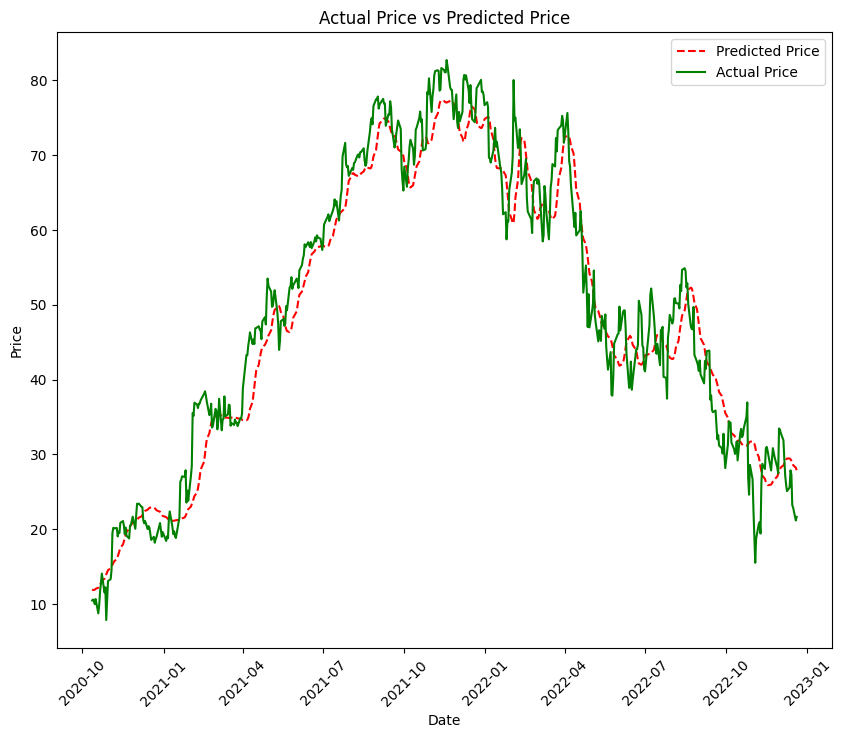

In [ ]:
# Assuming 'data' already has a 'Date' column and 'data_test' is derived from it

# Step 1: Concatenate the last 100 days of training data to test data
past_100_days = data_train.tail(100)  # Extract the last 100 days of training data
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

# Step 2: Scale the data
data_test_scale = scaler.fit_transform(data_test)

# Step 3: Prepare x and y for testing
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])  # Actual price for comparison
x, y = np.array(x), np.array(y)

# Step 4: Make predictions
y_predict = model.predict(x)

# Step 5: Rescale the predicted and actual prices
scale = 1 / scaler.scale_[0]  # Use the 'Close' column's scale
y_predict = y_predict * scale
y = y * scale

# Step 6: Convert x-axis indices to actual dates
dates = data['Date'][-len(y):].reset_index(drop=True)  # Extract dates for the test set

# Step 7: Plot the graph
plt.figure(figsize=(10, 8))
plt.plot(dates, y_predict, 'r', label='Predicted Price', linestyle='--')
plt.plot(dates, y, 'g', label='Actual Price', linestyle='-')
plt.xlabel('Date')  # x-axis is now Dates
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.show()


In [ ]:
model.save('Stock Predictions Model.keras')

In [ ]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
y_test = np.array(data_test)
y_pred = np.array(y_predict)


In [ ]:
y_test = y_test[-y_pred.shape[0]:]
smape_value = smape(y_test, y_pred)
accuracy_smape = 100 - smape_value


In [ ]:
mape_value = mape(y_test, y_pred)
accuracy_mape = 100 - mape_value

In [ ]:
print(f'SMAPE: {smape_value:.2f}%')
print(f'Accuracy (SMAPE): {accuracy_smape:.2f}%')

SMAPE: 88.35%
Accuracy (SMAPE): 11.65%


In [ ]:
print(f'MAPE: {mape_value:.2f}%')
print(f'Accuracy (MAPE): {accuracy_mape:.2f}%')

MAPE: 60.50%
Accuracy (MAPE): 39.50%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(data_train.index.values.reshape(-1, 1), data_train.values.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(data_test.index.values.reshape(-1, 1))

In [ ]:
rf_predictions_rescaled = rf_predictions * scale
y_test_rescaled = data_test.values * scale

In [ ]:
rf_mape = np.mean(np.abs((y_test_rescaled - rf_predictions_rescaled) / y_test_rescaled)) * 100
rf_accuracy = 100 - rf_mape

In [ ]:
print(f'Random Forest MAPE: {rf_mape:.2f}%')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}%')

Random Forest MAPE: 79.89%
Random Forest Accuracy: 20.11%


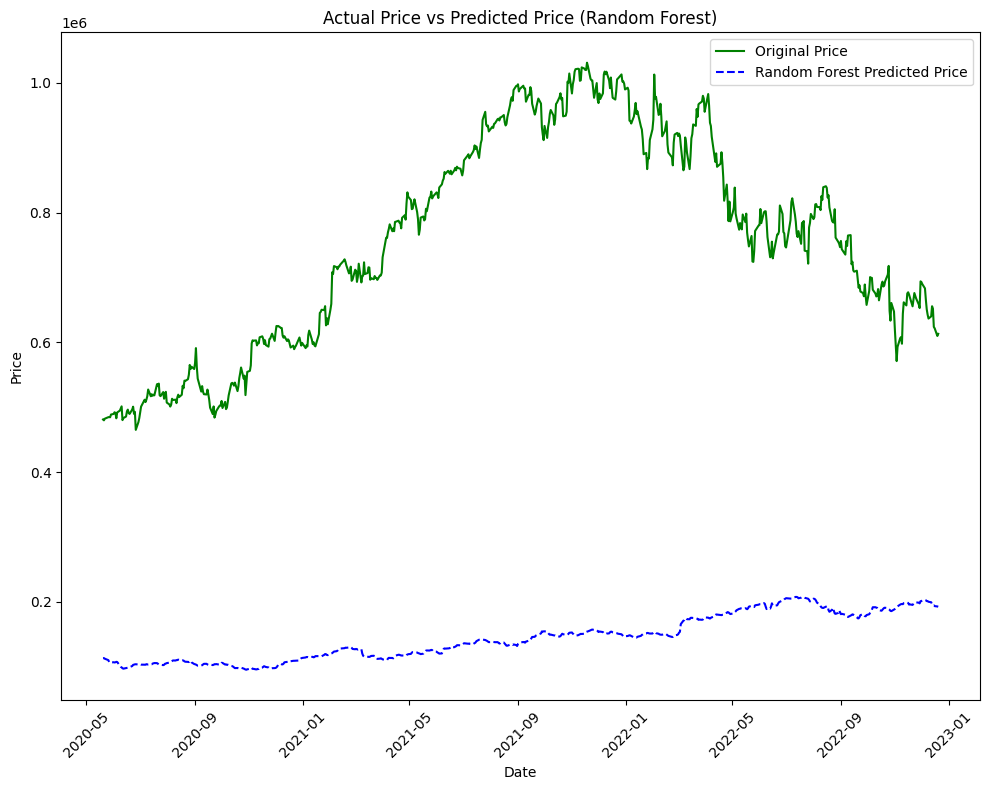

In [ ]:
dates = data['Date'][-len(y_test_rescaled):].reset_index(drop=True)
rf_predictions_rescaled = rf_predictions_rescaled.flatten()
y_test_rescaled = y_test_rescaled.flatten()
rf_predictions_rescaled *= scale
y_test_rescaled *= scale


plt.figure(figsize=(10, 8))
plt.plot(dates, y_test_rescaled, label='Original Price', color='g', linestyle='-')
plt.plot(dates, rf_predictions_rescaled, label='Random Forest Predicted Price', color='b', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Random Forest)')
plt.legend()
plt.xticks(rotation=45)
#plt.ylim(10, 80)  # Force y-axis range to 10–80
plt.tight_layout()
plt.show()

In [ ]:
#Gradient Boosting Regressor (GBR) Implementation


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
gbr_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
gbr_model.fit(data_train.index.values.reshape(-1, 1), data_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [ ]:
gbr_predictions = gbr_model.predict(data_test.index.values.reshape(-1, 1))

In [ ]:
gbr_predictions_rescaled = gbr_predictions * scale
y_test_rescaled = data_test.values * scale

In [ ]:
gbr_mape = mean_absolute_percentage_error(y_test_rescaled, gbr_predictions_rescaled) * 100
gbr_accuracy = 100 - gbr_mape

In [ ]:
print(f'Gradient Boosting MAPE: {gbr_mape:.2f}%')
print(f'Gradient Boosting Accuracy: {gbr_accuracy:.2f}%')

Gradient Boosting MAPE: 80.43%
Gradient Boosting Accuracy: 19.57%


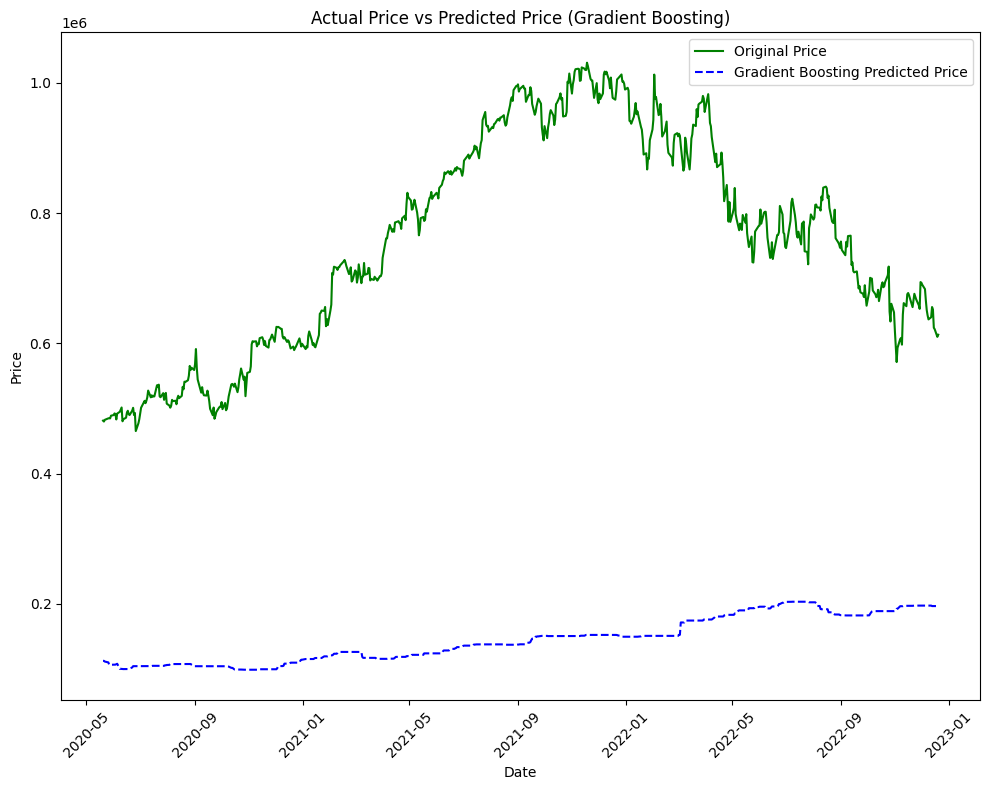

In [ ]:
gbr_predictions_rescaled = gbr_predictions_rescaled.flatten()
y_test_rescaled = y_test_rescaled.flatten()

# Rescale to match the LSTM range
gbr_predictions_rescaled *= scale
y_test_rescaled *= scale

# Plot Gradient Boosting
plt.figure(figsize=(10, 8))
plt.plot(dates, y_test_rescaled, label='Original Price', color='g', linestyle='-')
plt.plot(dates, gbr_predictions_rescaled, label='Gradient Boosting Predicted Price', color='b', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Price vs Predicted Price (Gradient Boosting)')
plt.legend()
plt.xticks(rotation=45)
#plt.ylim(10, 80)  # Force y-axis range to 10–80
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
#Hyperparameter Tuning Using GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10]
}

In [50]:
rf = RandomForestRegressor(random_state=42)

In [48]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(data_train.index.values.reshape(-1, 1), data_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [49]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [51]:
best_rf_model = grid_search.best_estimator_

In [52]:
from sklearn.ensemble import StackingRegressor

In [53]:
base_models = [('random_forest', RandomForestRegressor(n_estimators=200, random_state=42)),
               ('gradient_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42))]

In [54]:
stacking_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(n_estimators=100))


In [55]:
stacking_model.fit(data_train.index.values.reshape(-1, 1), data_train.values.ravel())


StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42)),
                              ('gradient_boosting',
                               GradientBoostingRegressor(n_estimators=200,
                                                         random_state=42))],
                  final_estimator=RandomForestRegressor())

In [56]:
stacked_predictions = stacking_model.predict(data_test.index.values.reshape(-1, 1))


In [57]:
!pip install pandas_ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=0c0a1d68b47df5ecf0d36a75bb684401877ea7b2855850e760527b1ea9a08087
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [58]:
import pandas_ta as ta

In [59]:
macd = ta.macd(data['Close'])
print(macd)
print(data['Close'].isna().sum())
macd = ta.macd(data['Close'], fillna=True)
print(macd)


None
Ticker
GOOG    0
dtype: int64
None


In [60]:
data.dropna(inplace=True)

In [61]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [62]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#Sentiment Analysis on News Data
#API collected from NewsAPI

In [64]:
analyzer = SentimentIntensityAnalyzer()

In [65]:
def get_news_sentiment(stock):
    url = f'https://newsapi.org/v2/everything?q={stock}&from={start}&to={end}&sortBy=popularity&apiKey=22bd9d064f6d407c80cabce62dd9b1fe'
    news_data = requests.get(url).json()
    headlines = [article['title'] for article in news_data['articles']]
    sentiment_scores = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]
    return np.mean(sentiment_scores)
    data['sentiment_score'] = data['Date'].apply(lambda x: get_news_sentiment(stock))


In [66]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.4 MB/s eta 0:00:00


In [67]:
model.save('/content/Stock Market Prediction.keras')
